In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Data

The dataset provides website phishing information. It includes 1353 records and 10 fields. The classification goal is to predict whether an action is a website phishing or not (variable Result)

In [2]:
data = pd.read_csv('Website_Phishing.csv')
print(data.shape)
print(data.columns)

(1353, 10)
Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
SFH                  1353 non-null int64
popUpWidnow          1353 non-null int64
SSLfinal_State       1353 non-null int64
Request_URL          1353 non-null int64
URL_of_Anchor        1353 non-null int64
web_traffic          1353 non-null int64
URL_Length           1353 non-null int64
age_of_domain        1353 non-null int64
having_IP_Address    1353 non-null int64
Result               1353 non-null int64
dtypes: int64(10)
memory usage: 105.8 KB


In [4]:
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [5]:
data.tail()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1
1352,1,0,1,1,1,0,-1,-1,0,-1


In [6]:
data.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data exploration

In [7]:
data['Result'].value_counts()

-1    702
 1    548
 0    103
Name: Result, dtype: int64

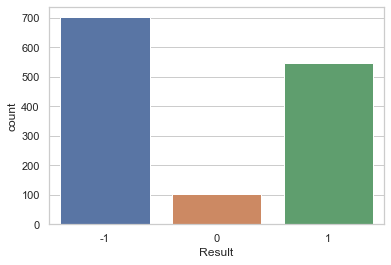

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='Result', data=data)
plt.show()
plt.savefig('diabetes_count_plot')

In [9]:
count_Result1 = len(data[data['Result']== 0])
count_Result2 = len(data[data['Result']== -1])
count_Result3 = len(data[data['Result']== 1])
pct_of_Result1 = count_Result1/(count_Result1+count_Result2+count_Result3)
print("\033[1m percentage of times 0 repeated in Result is\033[1m", pct_of_Result1*100)
pct_of_Result2 = count_Result2/(count_Result1+count_Result2+count_Result3)
print("\033[1m percentage of times -1 repeated in Result is\033[1m", pct_of_Result2*100)
pct_of_Result3 = count_Result3/(count_Result1+count_Result2+count_Result3)
print("\033[1m percentage of times 1 repeated in Result is\033[1m", pct_of_Result3*100)

 percentage of times 0 repeated in Result is 7.612712490761271
 percentage of times -1 repeated in Result is 51.88470066518847
 percentage of times 1 repeated in Result is 40.502586844050256


In [10]:
data.groupby('Result').mean()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
Result,,,,,,,,,
-1,0.829060,0.064103,0.706553,0.019943,0.242165,-0.168091,0.045584,0.410256,0.131054
0,-0.029126,-0.320388,0.504854,-0.815534,-0.300971,-0.174757,0.349515,0.456311,0.126214
1,-0.468978,-0.660584,-0.191606,-0.423358,-0.315693,0.248175,-0.255474,-0.069343,0.091241


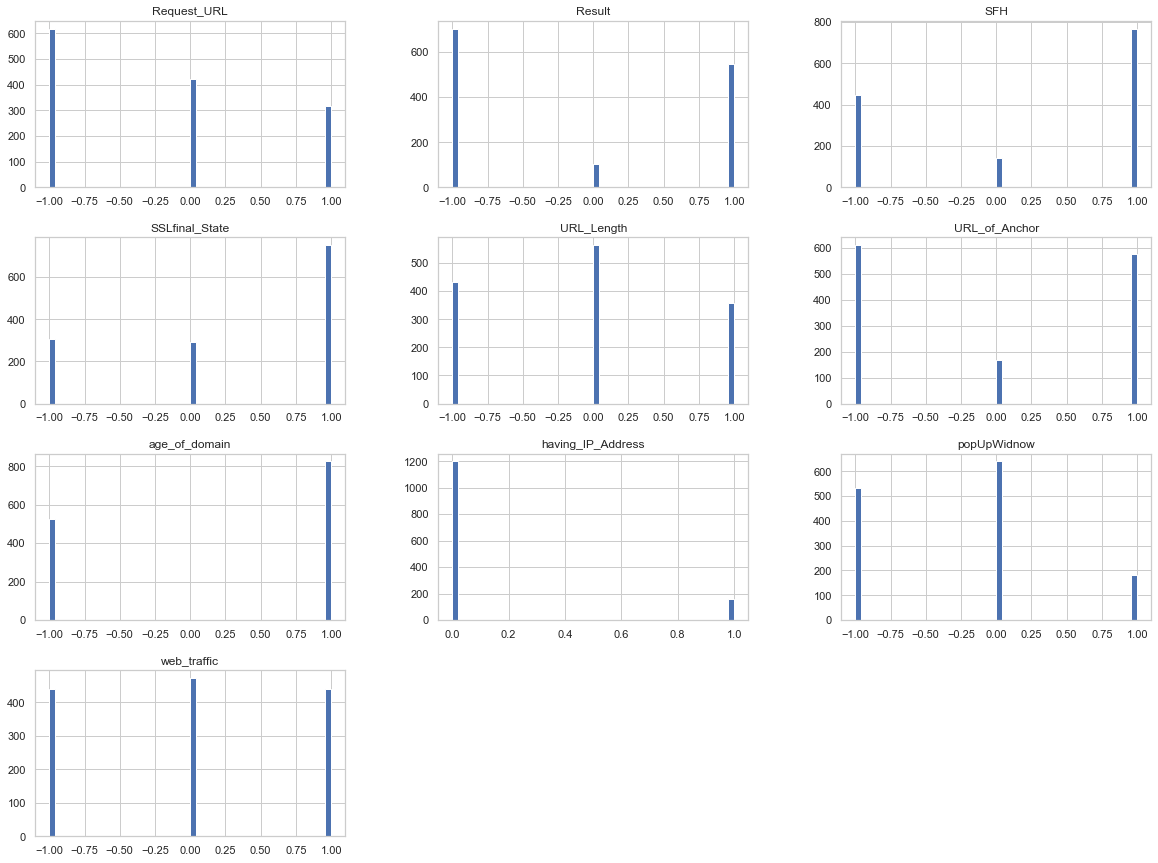

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

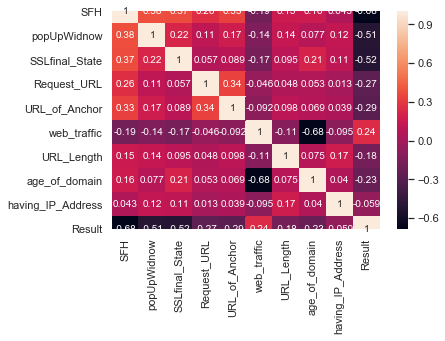

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
X = data.loc[:, data.columns != 'Result']
y = data.loc[:, data.columns == 'Result']

# Over-sampling using SMOTE

With our training data created, I’ll up-sample the diabetic using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor classes (class 0 and class 1) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [14]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1 = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Result'])

In [15]:
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of times 0 repeated in Result in oversampled data",len(os_data_y[os_data_y['Result']== 0]))
print("\033[1m Number of times -1 repeated in Result in",len(os_data_y[os_data_y['Result']== -1]))
print("\033[1m Number of times 1 repeated in Result in",len(os_data_y[os_data_y['Result']== 1]))
print("\033[1m Proportion of times 0 repeated in Result in oversampled data is ",len(os_data_y[os_data_y['Result']== 0])/len(os_data_X))
print("\033[1m Proportion of times -1 repeated in Result in oversampled data is ",len(os_data_y[os_data_y['Result']== -1])/len(os_data_X))
print("\033[1m Proportion of times 1 repeated in Result in oversampled data is ",len(os_data_y[os_data_y['Result']== 1])/len(os_data_X))

 length of oversampled data is 1494
 Number of times 0 repeated in Result in oversampled data 498
 Number of times -1 repeated in Result in 498
 Number of times 1 repeated in Result in 498
 Proportion of times 0 repeated in Result in oversampled data is  0.3333333333333333
 Proportion of times -1 repeated in Result in oversampled data is  0.3333333333333333
 Proportion of times 1 repeated in Result in oversampled data is  0.3333333333333333


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

 __Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


In [17]:
X.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address'],
      dtype='object')

The RFE has helped us select the following features: ''SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address'.

In [18]:
cols=['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']
X=os_data_X[cols]
y=os_data_y['Result']

# Train and Validate Random Forest Classifier Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [20]:
y_pred_rf = rf.predict(X_test)
print("\033[1m Accuracy of Random Forest Classifier Model on test set:", '{:.4f}'.format(rf.score(X_test, y_test)))

 Accuracy of Random Forest Classifier Model on test set: 0.9532


###  Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[147   1  13]
 [  0 152   1]
 [  4   2 129]]


In [22]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[0,2]+confusion_matrix[1,0]+confusion_matrix[1,2]+confusion_matrix[2,0]+confusion_matrix[2,1]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  428 correct predictions
 The result is telling us that we have:  21 incorrect predictions
 We have a total predictions of:  449


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.97      0.91      0.94       161
           0       0.98      0.99      0.99       153
           1       0.90      0.96      0.93       135

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



### Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest Classifier Model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_rf)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_rf)))
#calculate Precision
print("\nPrecision of Random Forest Classifier Model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_rf,average='weighted')))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random \nForest Classifier Model predicted an action is a website phishing, that action is actually a website phishing","{:.2%}".format(metrics.precision_score(y_test, y_pred_rf,average='weighted')),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest Classifier Model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_rf,average='weighted')))
print("Recall: If there is a website phishing in the test set, our Random Forest Classifier\nModel can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred_rf,average='weighted')) ,"of the time.")

Accuracy of Random Forest Classifier Model: 95.32%
Well, you got a classification rate of 95.32%

Precision of Random Forest Classifier Model: 95.45%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random 
Forest Classifier Model predicted an action is a website phishing, that action is actually a website phishing 95.45% of
 the time.

Recall of Random Forest Classifier Model: 95.32%
Recall: If there is a website phishing in the test set, our Random Forest Classifier
Model can identify it 95.32% of the time.


### Feature importance

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [25]:
feature_labels = np.array(cols)

In [26]:
feature_labels = np.array(cols)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

SFH-22.05%
SSLfinal_State-18.84%
Request_URL-14.51%
URL_of_Anchor-14.34%
URL_Length-11.39%
popUpWidnow-6.62%
web_traffic-5.67%
age_of_domain-4.76%
having_IP_Address-1.82%


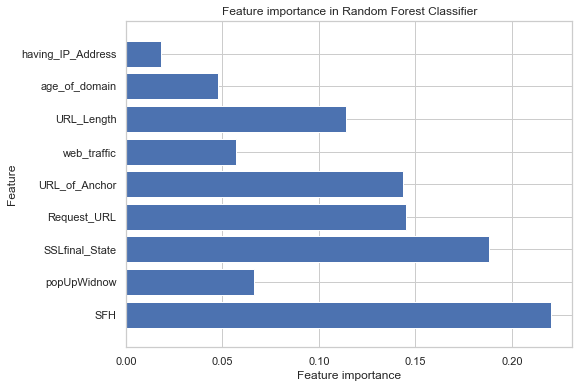

In [27]:
plt.figure(figsize=(8,6))
n_features =len(feature_labels)
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_labels)
plt.title('Feature importance in Random Forest Classifier')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

# Getting the Probability to Phishing

In [28]:
data['Probability to Phishing'] = rf.predict_proba(data[X_train.columns])[:,1]
data[['Probability to Phishing']].head(10)

,Probability to Phishing
0,0.968564
1,0.050000
2,0.000000
3,0.929380
4,0.120000
5,0.020000
6,0.000000
7,0.000000
8,0.477619
9,0.000000
